/tmp/ipython-input-1734968256.py:69: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


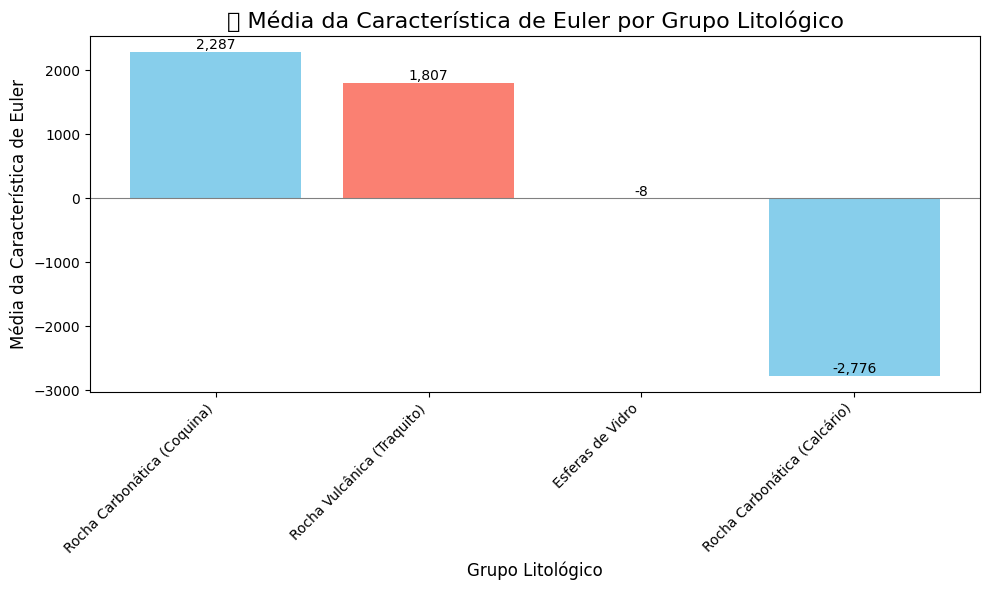

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# Dados fornecidos na tabela (copiados para uma string multilinha)
# Usei as colunas 'Grupo Litológico' e 'Característica de Euler'
dados_string = """
ID da Amostra,Grupo Litológico,Voxel Size (µm),Porosidade Total [%],Porosidade Efetiva [%],Fração de Poros Isolados [%],Dimensão Fractal,Característica de Euler
BC22_TQ-01_40,Rocha Vulcânica (Traquito),40,6.230,0.530,91.490,2.689,489.000
BC22_TQ-02_40,Rocha Vulcânica (Traquito),40,9.770,2.810,71.240,2.761,1018.000
BC23_TQ-05_40,Rocha Vulcânica (Traquito),40,5.340,2.080,61.050,2.759,5206.000
BC23_TQ-06_40,Rocha Vulcânica (Traquito),40,6.440,0.640,90.060,2.301,1071.000
BC23_TQ-07_40,Rocha Vulcânica (Traquito),40,6.360,1.110,82.550,2.708,1250.000
DS23_CF4_3mm,Esferas de Vidro,25,27.250,27.250,0.000,2.686,2.000
DS23_CF5_3mm,Esferas de Vidro,25,28.240,28.230,0.040,2.751,-38.000
DS23_CF7_4mm,Esferas de Vidro,25,31.180,31.180,0.000,2.697,1.000
DS23_CF10_M,Esferas de Vidro,25,38.390,38.390,0.000,2.725,1.000
GT24_01_40,Rocha Carbonática (Coquina),40,14.220,5.550,60.970,2.949,1893.000
GT24_02_40,Rocha Carbonática (Coquina),40,10.680,2.330,78.180,2.995,5002.000
GT24_03_40,Rocha Carbonática (Coquina),40,13.660,5.840,57.250,2.890,1897.000
GT24_04_40,Rocha Carbonática (Coquina),40,8.270,2.250,72.790,2.957,4482.000
GT24_05_40,Rocha Carbonática (Coquina),40,4.360,0.590,86.470,2.819,2553.000
GT24_06_40,Rocha Carbonática (Coquina),40,14.420,2.350,83.700,2.922,1383.000
GT24_07_40,Rocha Carbonática (Coquina),40,17.130,3.730,78.230,2.916,2405.000
GT24_08_40,Rocha Carbonática (Coquina),40,9.250,1.670,81.950,2.886,2058.000
GT24_09_40,Rocha Carbonática (Coquina),40,8.480,2.280,73.110,2.758,225.000
GT24_10_40,Rocha Carbonática (Coquina),40,10.840,4.240,60.890,2.950,2135.000
GT24_11_40,Rocha Carbonática (Coquina),40,9.840,1.090,88.920,2.926,2962.000
GT24_12_40,Rocha Carbonática (Coquina),40,5.620,0.810,85.590,2.730,449.000
VN01_AMOSTRAX,Rocha Carbonática (Calcário),40,52.640,52.610,0.060,3.191,-2380.000
VN02_AMOSTRA01,Rocha Carbonática (Calcário),40,51.500,51.380,0.230,3.191,-1872.000
VN04_AMOSTRAX2,Rocha Carbonática (Calcário),40,25.480,21.410,15.970,3.126,-4076.000
"""

# 1. Carregar os dados
# Usamos 'io.StringIO' para simular a leitura de um arquivo CSV a partir da string
df = pd.read_csv(io.StringIO(dados_string))

# Garantir que a coluna 'Característica de Euler' seja numérica
df['Característica de Euler'] = pd.to_numeric(df['Característica de Euler'], errors='coerce')

# 2. Calcular a média da Característica de Euler por Grupo Litológico
# O 'groupby' agrupa as linhas pelo valor da coluna e 'mean()' calcula a média da coluna especificada.
media_euler_por_grupo = df.groupby('Grupo Litológico')['Característica de Euler'].mean().sort_values(ascending=False)

# 3. Gerar o Gráfico de Barras
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras
barras = plt.bar(media_euler_por_grupo.index, media_euler_por_grupo.values, color=['skyblue', 'salmon', 'lightgreen'])

# Adicionar o título e os rótulos
plt.title('📊 Média da Característica de Euler por Grupo Litológico', fontsize=16)
plt.xlabel('Grupo Litológico', fontsize=12)
plt.ylabel('Média da Característica de Euler', fontsize=12)

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionar os valores exatos em cima das barras (opcional, mas útil)
for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.0f}', ha='center', va='bottom')

# Adicionar uma linha horizontal no zero para referência
plt.axhline(0, color='grey', linewidth=0.8)

# Ajustar o layout para evitar cortes
plt.tight_layout()

# Exibir o gráfico
plt.show()

/tmp/ipython-input-3347052205.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Grupo Litológico', y='Característica de Euler', data=df,


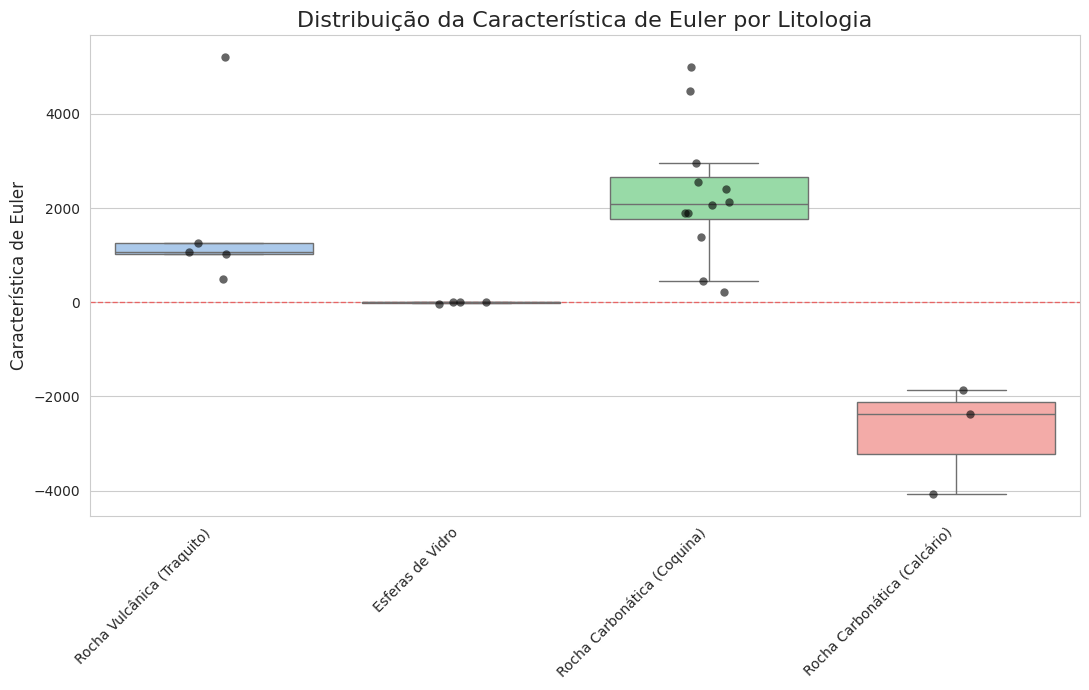

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# --- (Mesma carga de dados anterior) ---
dados_string = """
ID da Amostra,Grupo Litológico,Voxel Size (µm),Porosidade Total [%],Porosidade Efetiva [%],Fração de Poros Isolados [%],Dimensão Fractal,Característica de Euler
BC22_TQ-01_40,Rocha Vulcânica (Traquito),40,6.230,0.530,91.490,2.689,489.000
BC22_TQ-02_40,Rocha Vulcânica (Traquito),40,9.770,2.810,71.240,2.761,1018.000
BC23_TQ-05_40,Rocha Vulcânica (Traquito),40,5.340,2.080,61.050,2.759,5206.000
BC23_TQ-06_40,Rocha Vulcânica (Traquito),40,6.440,0.640,90.060,2.301,1071.000
BC23_TQ-07_40,Rocha Vulcânica (Traquito),40,6.360,1.110,82.550,2.708,1250.000
DS23_CF4_3mm,Esferas de Vidro,25,27.250,27.250,0.000,2.686,2.000
DS23_CF5_3mm,Esferas de Vidro,25,28.240,28.230,0.040,2.751,-38.000
DS23_CF7_4mm,Esferas de Vidro,25,31.180,31.180,0.000,2.697,1.000
DS23_CF10_M,Esferas de Vidro,25,38.390,38.390,0.000,2.725,1.000
GT24_01_40,Rocha Carbonática (Coquina),40,14.220,5.550,60.970,2.949,1893.000
GT24_02_40,Rocha Carbonática (Coquina),40,10.680,2.330,78.180,2.995,5002.000
GT24_03_40,Rocha Carbonática (Coquina),40,13.660,5.840,57.250,2.890,1897.000
GT24_04_40,Rocha Carbonática (Coquina),40,8.270,2.250,72.790,2.957,4482.000
GT24_05_40,Rocha Carbonática (Coquina),40,4.360,0.590,86.470,2.819,2553.000
GT24_06_40,Rocha Carbonática (Coquina),40,14.420,2.350,83.700,2.922,1383.000
GT24_07_40,Rocha Carbonática (Coquina),40,17.130,3.730,78.230,2.916,2405.000
GT24_08_40,Rocha Carbonática (Coquina),40,9.250,1.670,81.950,2.886,2058.000
GT24_09_40,Rocha Carbonática (Coquina),40,8.480,2.280,73.110,2.758,225.000
GT24_10_40,Rocha Carbonática (Coquina),40,10.840,4.240,60.890,2.950,2135.000
GT24_11_40,Rocha Carbonática (Coquina),40,9.840,1.090,88.920,2.926,2962.000
GT24_12_40,Rocha Carbonática (Coquina),40,5.620,0.810,85.590,2.730,449.000
VN01_AMOSTRAX,Rocha Carbonática (Calcário),40,52.640,52.610,0.060,3.191,-2380.000
VN02_AMOSTRA01,Rocha Carbonática (Calcário),40,51.500,51.380,0.230,3.191,-1872.000
VN04_AMOSTRAX2,Rocha Carbonática (Calcário),40,25.480,21.410,15.970,3.126,-4076.000
"""

df = pd.read_csv(io.StringIO(dados_string))
df['Característica de Euler'] = pd.to_numeric(df['Característica de Euler'], errors='coerce')

# --- Gerar o Boxplot ---
plt.figure(figsize=(11, 7))

# Configurar estilo
sns.set_style("whitegrid")

# 1. Criar o Boxplot (mostra a distribuição estatística)
# A opção 'showfliers=False' esconde os pontos outliers do boxplot padrão
# para não duplicar com o stripplot que faremos abaixo, mas se preferir ver tudo, remova.
ax = sns.boxplot(x='Grupo Litológico', y='Característica de Euler', data=df,
                 palette="pastel", showfliers=False)

# 2. Adicionar Stripplot (mostra os pontos reais)
# Isso é crucial porque temos poucas amostras.
sns.stripplot(x='Grupo Litológico', y='Característica de Euler', data=df,
              color='black', alpha=0.6, jitter=True, size=6)

# Melhorias visuais
plt.title('Distribuição da Característica de Euler por Litologia', fontsize=16)
plt.ylabel('Característica de Euler', fontsize=12)
plt.xlabel('')
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5) # Linha zero para referência

# Rotacionar nomes do eixo X para não encavalar
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

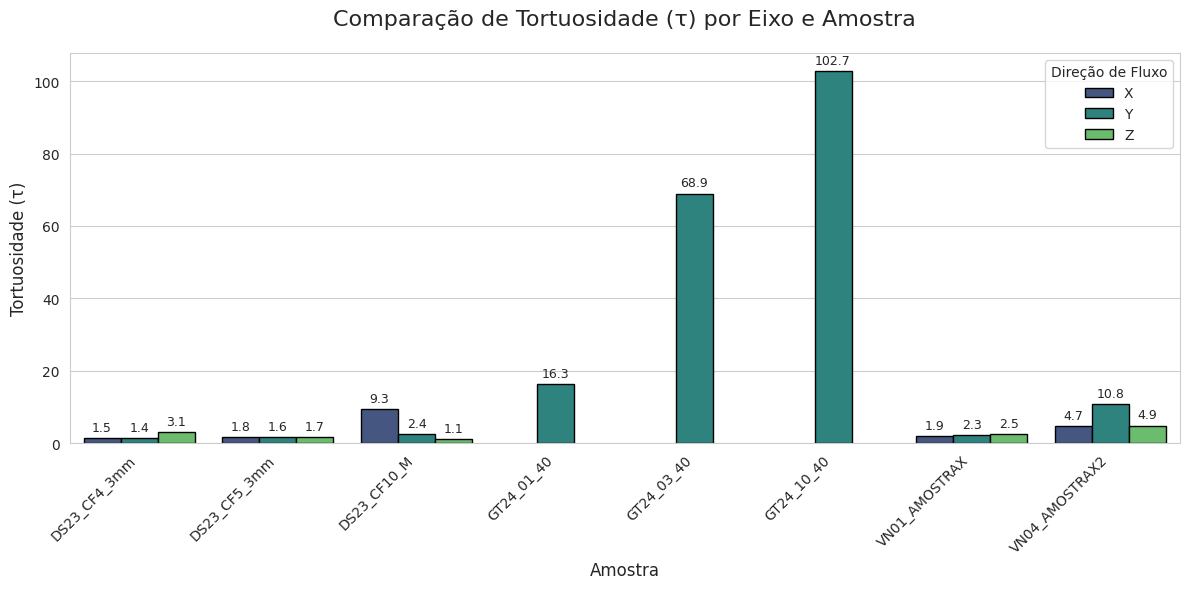

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np

# Dados fornecidos (formatados como CSV para leitura correta)
data_string = """ID da Amostra,Eixo,Fator de Formação (F),Expoente de Cimentação (m),Tortuosidade (τ)
DS23_CF4_3mm,X,8.439,1.64,1.517
,Y,7.37,1.54,1.417
,Z,34.901,2.73,3.084
DS23_CF5_3mm,X,11.396,1.92,1.794
,Y,9.483,1.78,1.636
,Z,10.108,1.83,1.689
DS23_CF10_M,X,227.58,5.67,9.347
,Y,15.3,2.85,2.424
,Z,3.436,1.29,1.148
GT24_01_40,Y,330.35,2.93,16.283
GT24_03_40,Y,155.94,3.98,68.926
GT24_10_40,Y,162.59,3.79,102.675
VN01_AMOSTRAX,X,7.065,3.04,1.928
,Y,9.856,3.56,2.277
,Z,11.635,3.82,2.474
VN04_AMOSTRAX2,X,101.74,3,4.668
,Y,545.96,4.09,10.812
,Z,111.962,3.06,4.896"""

# 1. Carregar e Limpar Dados
df = pd.read_csv(io.StringIO(data_string))

# Preencher os IDs vazios com o valor da linha de cima (Forward Fill)
# Isso corrige as linhas onde só tem o Eixo Y ou Z e o ID está vazio
df['ID da Amostra'] = df['ID da Amostra'].ffill()

# 2. Configurar o Gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Criar o gráfico de barras agrupadas
# x = Categorias (Amostras)
# y = Valor numérico (Tortuosidade)
# hue = O agrupador (Eixos X, Y, Z)
ax = sns.barplot(x='ID da Amostra', y='Tortuosidade (τ)', hue='Eixo',
                 data=df, palette='viridis', edgecolor='black')

# 3. Melhorias Visuais
plt.title('Comparação de Tortuosidade (τ) por Eixo e Amostra', fontsize=16, pad=20)
plt.xlabel('Amostra', fontsize=12)
plt.ylabel('Tortuosidade (τ)', fontsize=12)
plt.legend(title='Direção de Fluxo')

# Rotacionar os nomes das amostras para leitura fácil
plt.xticks(rotation=45, ha='right')

# Adicionar os valores numéricos em cima das barras para precisão
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

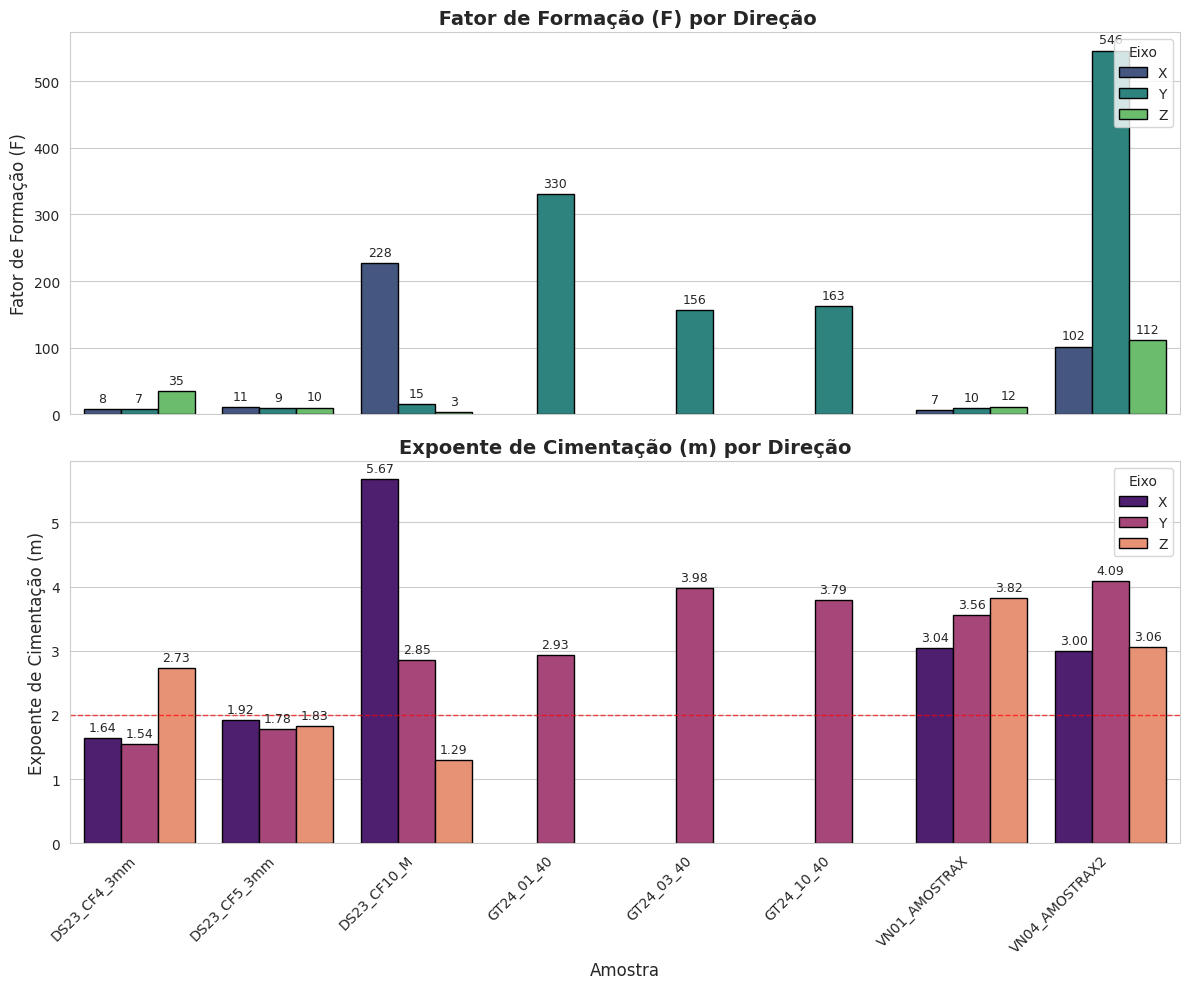

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Dados (reutilizando a mesma string para garantir consistência)
data_string = """ID da Amostra,Eixo,Fator de Formação (F),Expoente de Cimentação (m),Tortuosidade (τ)
DS23_CF4_3mm,X,8.439,1.64,1.517
,Y,7.37,1.54,1.417
,Z,34.901,2.73,3.084
DS23_CF5_3mm,X,11.396,1.92,1.794
,Y,9.483,1.78,1.636
,Z,10.108,1.83,1.689
DS23_CF10_M,X,227.58,5.67,9.347
,Y,15.3,2.85,2.424
,Z,3.436,1.29,1.148
GT24_01_40,Y,330.35,2.93,16.283
GT24_03_40,Y,155.94,3.98,68.926
GT24_10_40,Y,162.59,3.79,102.675
VN01_AMOSTRAX,X,7.065,3.04,1.928
,Y,9.856,3.56,2.277
,Z,11.635,3.82,2.474
VN04_AMOSTRAX2,X,101.74,3,4.668
,Y,545.96,4.09,10.812
,Z,111.962,3.06,4.896"""

# 1. Tratamento dos Dados
df = pd.read_csv(io.StringIO(data_string))
df['ID da Amostra'] = df['ID da Amostra'].ffill() # Preenche células vazias

# 2. Configuração da Figura com Subplots
# cria 2 gráficos (ax1 e ax2) empilhados verticalmente
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

sns.set_style("whitegrid")

# --- GRÁFICO 1: FATOR DE FORMAÇÃO (F) ---
sns.barplot(x='ID da Amostra', y='Fator de Formação (F)', hue='Eixo',
            data=df, palette='viridis', edgecolor='black', ax=ax1)

ax1.set_title(' Fator de Formação (F) por Direção', fontsize=14, fontweight='bold')
ax1.set_ylabel('Fator de Formação (F)', fontsize=12)
ax1.set_xlabel('') # Remove o label X do gráfico de cima para não poluir
ax1.legend(loc='upper right', title='Eixo')

# Adiciona valores no topo das barras (Gráfico 1)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', padding=3, fontsize=9)

# --- GRÁFICO 2: EXPOENTE DE CIMENTAÇÃO (m) ---
sns.barplot(x='ID da Amostra', y='Expoente de Cimentação (m)', hue='Eixo',
            data=df, palette='magma', edgecolor='black', ax=ax2)

ax2.set_title('Expoente de Cimentação (m) por Direção', fontsize=14, fontweight='bold')
ax2.set_ylabel('Expoente de Cimentação (m)', fontsize=12)
ax2.set_xlabel('Amostra', fontsize=12)
ax2.legend(loc='upper right', title='Eixo')

# Adiciona linha de referência m=2 (típico de arenitos/rochas convencionais)
ax2.axhline(2, color='red', linestyle='--', linewidth=1, alpha=0.7, label='m=2 (Referência)')

# Adiciona valores no topo das barras (Gráfico 2)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

# Ajustes Finais
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

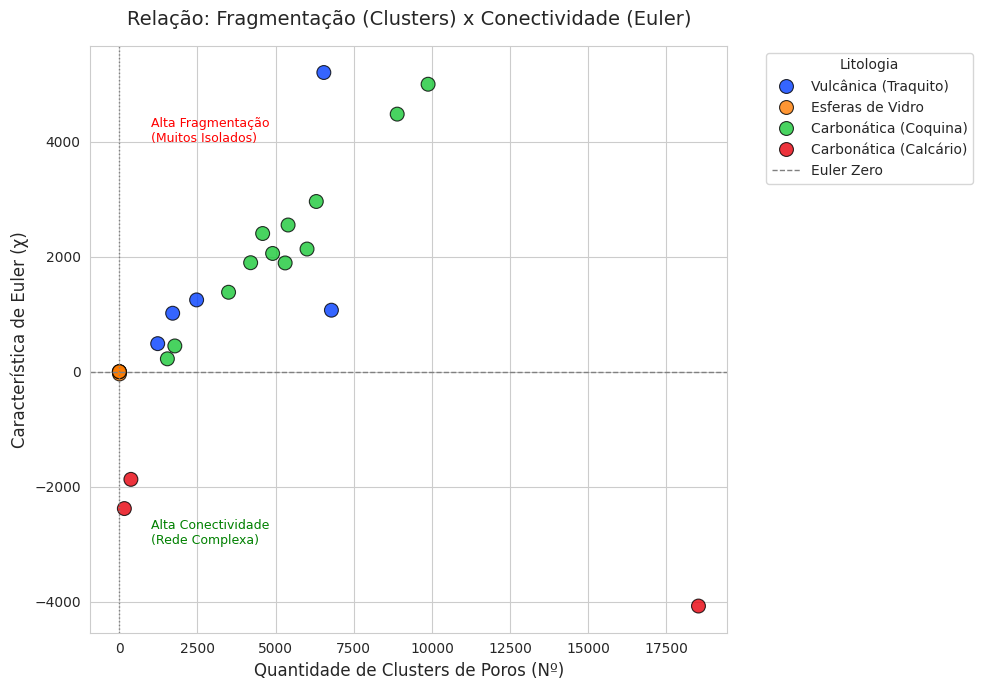

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# 1. Dados consolidados (Combinei manualmente os Clusters da Tabela 1 com a Euler da Tabela 2)
data = {
    'ID da Amostra': [
        'BC22_TQ-01_40', 'BC22_TQ-02_40', 'BC23_TQ-05_40', 'BC23_TQ-06_40', 'BC23_TQ-07_40',
        'DS23_CF4_3mm', 'DS23_CF5_3mm', 'DS23_CF7_4mm', 'DS23_CF10_M',
        'GT24_01_40', 'GT24_02_40', 'GT24_03_40', 'GT24_04_40', 'GT24_05_40',
        'GT24_06_40', 'GT24_07_40', 'GT24_08_40', 'GT24_09_40', 'GT24_10_40',
        'GT24_11_40', 'GT24_12_40',
        'VN01_AMOSTRAX', 'VN02_AMOSTRA01', 'VN04_AMOSTRAX2'
    ],
    'Grupo Litológico': [
        'Vulcânica (Traquito)', 'Vulcânica (Traquito)', 'Vulcânica (Traquito)', 'Vulcânica (Traquito)', 'Vulcânica (Traquito)',
        'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro',
        'Carbonática (Coquina)', 'Carbonática (Coquina)', 'Carbonática (Coquina)', 'Carbonática (Coquina)', 'Carbonática (Coquina)',
        'Carbonática (Coquina)', 'Carbonática (Coquina)', 'Carbonática (Coquina)', 'Carbonática (Coquina)', 'Carbonática (Coquina)',
        'Carbonática (Coquina)', 'Carbonática (Coquina)',
        'Carbonática (Calcário)', 'Carbonática (Calcário)', 'Carbonática (Calcário)'
    ],
    # Dados da Tabela 1
    'Clusters de Poros': [
        1227, 1706, 6541, 6784, 2472,
        1, 6, 2, 1,
        5304, 9876, 4200, 8888, 5398, 3494, 4584, 4903, 1537, 6004, 6300, 1775,
        161, 370, 18524
    ],
    # Dados da Tabela 2
    'Característica de Euler': [
        489, 1018, 5206, 1071, 1250,
        2, -38, 1, 1,
        1893, 5002, 1897, 4482, 2553, 1383, 2405, 2058, 225, 2135, 2962, 449,
        -2380, -1872, -4076
    ]
}

df = pd.DataFrame(data)

# 2. Configurar o Gráfico
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Criar Scatter Plot
# Hue define as cores baseadas no grupo da rocha
# s define o tamanho dos pontos
scatter = sns.scatterplot(
    data=df,
    x='Clusters de Poros',
    y='Característica de Euler',
    hue='Grupo Litológico',
    palette='bright',
    s=100,
    alpha=0.8,
    edgecolor='black'
)

# 3. Adicionar Linhas de Referência
plt.axhline(0, color='grey', linestyle='--', linewidth=1, label='Euler Zero')
plt.axvline(0, color='grey', linestyle=':', linewidth=1)

# 4. Anotações para Contexto (Opcional, mas útil para interpretação)
plt.text(1000, -3000, 'Alta Conectividade\n(Rede Complexa)', color='green', fontsize=9, ha='left')
plt.text(1000, 4000, 'Alta Fragmentação\n(Muitos Isolados)', color='red', fontsize=9, ha='left')

# 5. Estilização final
plt.title('Relação: Fragmentação (Clusters) x Conectividade (Euler)', fontsize=14, pad=15)
plt.xlabel('Quantidade de Clusters de Poros (Nº)', fontsize=12)
plt.ylabel('Característica de Euler (χ)', fontsize=12)
plt.legend(title='Litologia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

--- RESULTADOS ESTATÍSTICOS ---
1. Equação da Reta (Aproximação): y = 0.0783x + 844.94
2. Correlação de Pearson (r): 0.1534
3. Coeficiente de Determinação (R²): 0.0235
---------------------------------


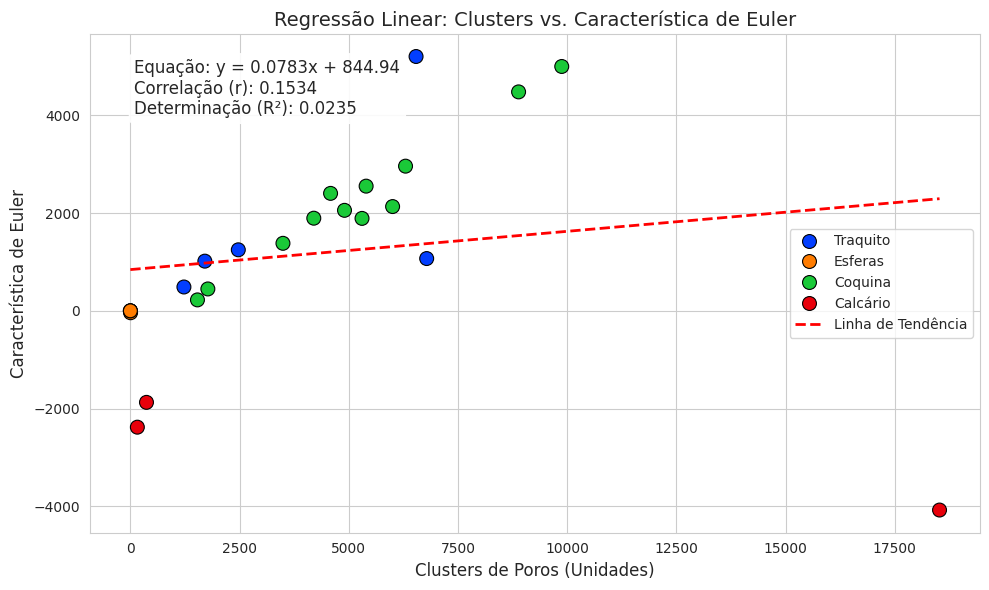

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 1. Carregar os Dados Consolidados
data = {
    'ID': [
        'BC22_TQ-01', 'BC22_TQ-02', 'BC23_TQ-05', 'BC23_TQ-06', 'BC23_TQ-07',
        'DS23_CF4', 'DS23_CF5', 'DS23_CF7', 'DS23_CF10',
        'GT24_01', 'GT24_02', 'GT24_03', 'GT24_04', 'GT24_05',
        'GT24_06', 'GT24_07', 'GT24_08', 'GT24_09', 'GT24_10',
        'GT24_11', 'GT24_12',
        'VN01', 'VN02', 'VN04_X2'
    ],
    'Grupo': [
        'Traquito', 'Traquito', 'Traquito', 'Traquito', 'Traquito',
        'Esferas', 'Esferas', 'Esferas', 'Esferas',
        'Coquina', 'Coquina', 'Coquina', 'Coquina', 'Coquina',
        'Coquina', 'Coquina', 'Coquina', 'Coquina', 'Coquina',
        'Coquina', 'Coquina',
        'Calcário', 'Calcário', 'Calcário'
    ],
    'X_Clusters': [
        1227, 1706, 6541, 6784, 2472,
        1, 6, 2, 1,
        5304, 9876, 4200, 8888, 5398, 3494, 4584, 4903, 1537, 6004, 6300, 1775,
        161, 370, 18524
    ],
    'Y_Euler': [
        489, 1018, 5206, 1071, 1250,
        2, -38, 1, 1,
        1893, 5002, 1897, 4482, 2553, 1383, 2405, 2058, 225, 2135, 2962, 449,
        -2380, -1872, -4076
    ]
}

df = pd.DataFrame(data)

# 2. Calcular a Regressão Linear (y = ax + b)
# slope = a (inclinação), intercept = b (interseção y)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['X_Clusters'], df['Y_Euler'])

# Calcular R²
r_squared = r_value**2

# Função da Reta (string para exibição)
equation = f"y = {slope:.4f}x + {intercept:.2f}"

# 3. Gerar o Gráfico
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plotar os pontos dispersos
sns.scatterplot(data=df, x='X_Clusters', y='Y_Euler', hue='Grupo', s=100, palette='bright', edgecolor='black')

# Plotar a reta de regressão
x_range = np.linspace(df['X_Clusters'].min(), df['X_Clusters'].max(), 100)
y_pred = slope * x_range + intercept
plt.plot(x_range, y_pred, color='red', linestyle='--', linewidth=2, label='Linha de Tendência')

# 4. Exibir os resultados estatísticos no gráfico
stats_text = (
    f"Equação: {equation}\n"
    f"Correlação (r): {r_value:.4f}\n"
    f"Determinação (R²): {r_squared:.4f}"
)

# Colocar caixa de texto no gráfico
plt.gca().text(0.05, 0.95, stats_text, transform=plt.gca().transAxes,
               fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.9))

plt.title('Regressão Linear: Clusters vs. Característica de Euler', fontsize=14)
plt.xlabel('Clusters de Poros (Unidades)', fontsize=12)
plt.ylabel('Característica de Euler', fontsize=12)
plt.legend(loc='center right')
plt.tight_layout()

print(f"--- RESULTADOS ESTATÍSTICOS ---")
print(f"1. Equação da Reta (Aproximação): {equation}")
print(f"2. Correlação de Pearson (r): {r_value:.4f}")
print(f"3. Coeficiente de Determinação (R²): {r_squared:.4f}")
print(f"---------------------------------")

plt.show()

=== RESULTADOS DA REGRESSÃO POR LITOLOGIA ===

ROCHA: Traquito (Vulcânica)
  > Equação: y = 0.4423x + 149.83
  > R²: 0.3866 (Explica 38.7% da variação)
  > Correlação (r): 0.6217

ROCHA: Coquina (Carbonática)
  > Equação: y = 0.5560x + -598.11
  > R²: 0.9594 (Explica 95.9% da variação)
  > Correlação (r): 0.9795

ROCHA: Calcário (Carbonática)
  > Equação: y = -0.1066x + -2099.23
  > R²: 0.9472 (Explica 94.7% da variação)
  > Correlação (r): -0.9733


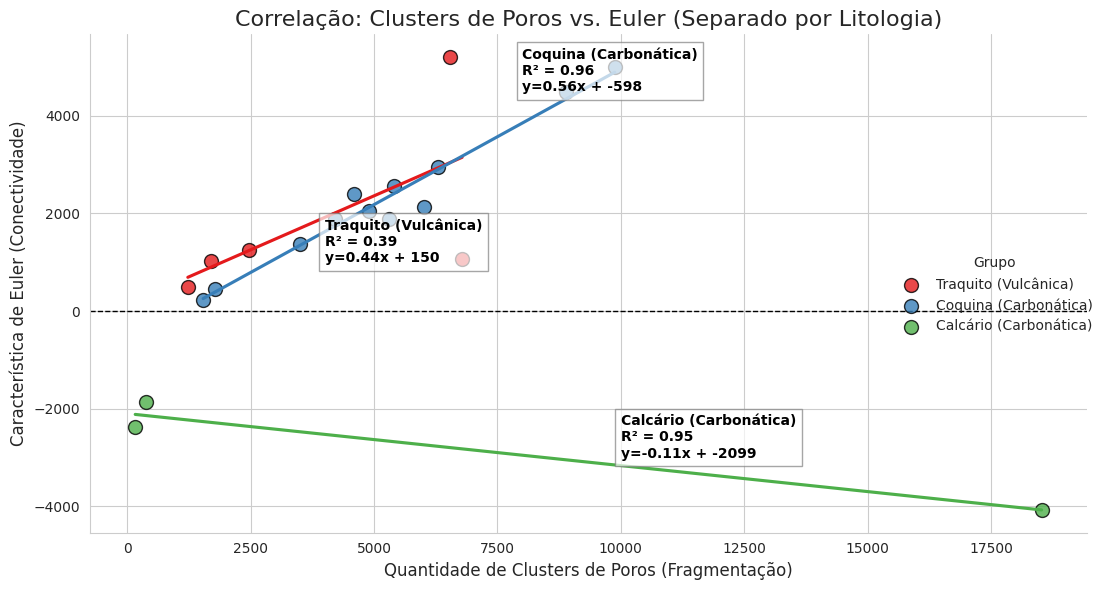

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 1. Carregar os Dados (Sem as Esferas de Vidro, pois distorcem a escala das Rochas)
# Focaremos nas rochas reais para ver as tendências geológicas
data = {
    'ID': [
        'BC22_TQ-01', 'BC22_TQ-02', 'BC23_TQ-05', 'BC23_TQ-06', 'BC23_TQ-07',
        'GT24_01', 'GT24_02', 'GT24_03', 'GT24_04', 'GT24_05',
        'GT24_06', 'GT24_07', 'GT24_08', 'GT24_09', 'GT24_10',
        'GT24_11', 'GT24_12',
        'VN01', 'VN02', 'VN04_X2'
    ],
    'Grupo': [
        'Traquito (Vulcânica)', 'Traquito (Vulcânica)', 'Traquito (Vulcânica)', 'Traquito (Vulcânica)', 'Traquito (Vulcânica)',
        'Coquina (Carbonática)', 'Coquina (Carbonática)', 'Coquina (Carbonática)', 'Coquina (Carbonática)', 'Coquina (Carbonática)',
        'Coquina (Carbonática)', 'Coquina (Carbonática)', 'Coquina (Carbonática)', 'Coquina (Carbonática)', 'Coquina (Carbonática)',
        'Coquina (Carbonática)', 'Coquina (Carbonática)',
        'Calcário (Carbonática)', 'Calcário (Carbonática)', 'Calcário (Carbonática)'
    ],
    'X_Clusters': [
        1227, 1706, 6541, 6784, 2472,
        5304, 9876, 4200, 8888, 5398, 3494, 4584, 4903, 1537, 6004, 6300, 1775,
        161, 370, 18524
    ],
    'Y_Euler': [
        489, 1018, 5206, 1071, 1250,
        1893, 5002, 1897, 4482, 2553, 1383, 2405, 2058, 225, 2135, 2962, 449,
        -2380, -1872, -4076
    ]
}

df = pd.DataFrame(data)

# 2. Configurar o Gráfico com Regressões Separadas
# lmplot cria automaticamente uma regressão para cada categoria no 'hue'
g = sns.lmplot(
    data=df,
    x='X_Clusters',
    y='Y_Euler',
    hue='Grupo',
    height=6,
    aspect=1.5,
    palette='Set1',
    ci=None, # Remove o intervalo de confiança para limpar o visual
    scatter_kws={'s': 100, 'edgecolor': 'black'}
)

# 3. Calcular e Imprimir as Estatísticas Individuais
print("=== RESULTADOS DA REGRESSÃO POR LITOLOGIA ===")
grupos = df['Grupo'].unique()

for grupo in grupos:
    df_grupo = df[df['Grupo'] == grupo]

    # Calcular regressão linear
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_grupo['X_Clusters'], df_grupo['Y_Euler'])
    r_squared = r_value**2

    # Imprimir no console
    print(f"\nROCHA: {grupo}")
    print(f"  > Equação: y = {slope:.4f}x + {intercept:.2f}")
    print(f"  > R²: {r_squared:.4f} (Explica {r_squared*100:.1f}% da variação)")
    print(f"  > Correlação (r): {r_value:.4f}")

    # Adicionar o texto da equação no gráfico (ajuste manual de posição para não sobrepor)
    if "Traquito" in grupo:
        pos_x, pos_y = 4000, 1000
    elif "Coquina" in grupo:
        pos_x, pos_y = 8000, 4500
    else: # Calcário
        pos_x, pos_y = 10000, -3000

    plt.text(pos_x, pos_y,
             f"{grupo}\nR² = {r_squared:.2f}\ny={slope:.2f}x + {intercept:.0f}",
             fontsize=10, fontweight='bold', color='black',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

# Ajustes finais do gráfico
plt.title('Correlação: Clusters de Poros vs. Euler (Separado por Litologia)', fontsize=16)
plt.axhline(0, color='black', linestyle='--', linewidth=1) # Linha zero
plt.ylabel('Característica de Euler (Conectividade)', fontsize=12)
plt.xlabel('Quantidade de Clusters de Poros (Fragmentação)', fontsize=12)

plt.tight_layout()
plt.show()

AVISO: Nenhum dado novo de Dolomita inserido. Plotando apenas os grupos existentes.
=== ESTATÍSTICAS DE REGRESSÃO ===

ROCHA: Traquito
  > R²: 0.3866
  > Eq: y = 0.4423x + 149.83

ROCHA: Coquina
  > R²: 0.9594
  > Eq: y = 0.5560x + -598.11

ROCHA: Calcário (VN)
  > R²: 0.9472
  > Eq: y = -0.1066x + -2099.23


<Figure size 1200x700 with 0 Axes>

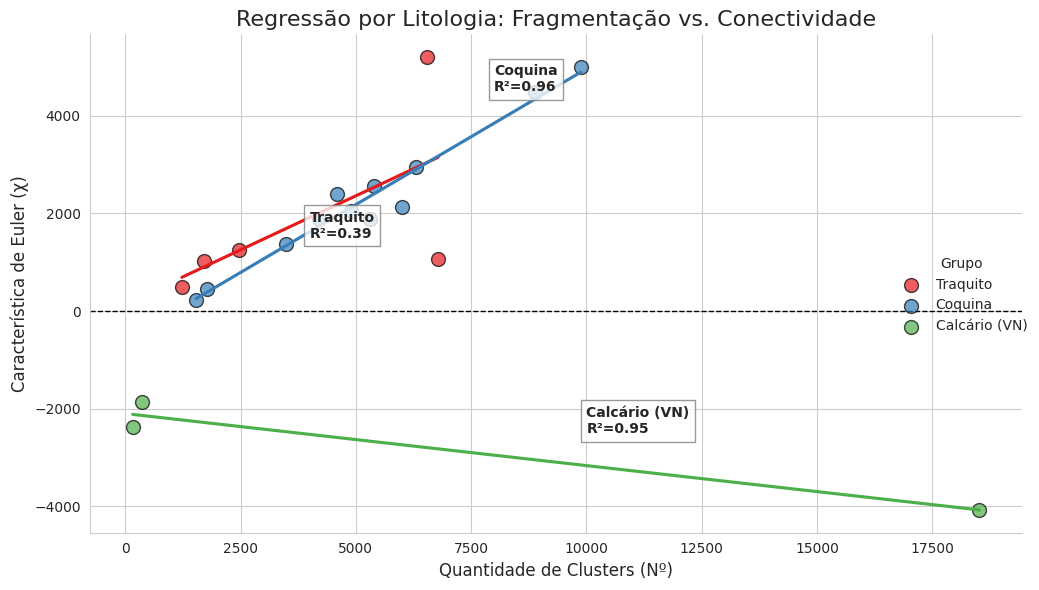

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# --- 1. SEUS DADOS ---
data = {
    'Grupo': [],
    'X_Clusters': [],
    'Y_Euler': []
}

# Função auxiliar para adicionar dados facilmente
def adicionar_dados(grupo, clusters, euler):
    for c, e in zip(clusters, euler):
        data['Grupo'].append(grupo)
        data['X_Clusters'].append(c)
        data['Y_Euler'].append(e)

# --- INSERIR DADOS EXISTENTES (Das tabelas) ---
# Traquitos (Vulcânicas)
adicionar_dados('Traquito',
               [1227, 1706, 6541, 6784, 2472],
               [489, 1018, 5206, 1071, 1250])

# Coquinas (Carbonáticas)
adicionar_dados('Coquina',
               [5304, 9876, 4200, 8888, 5398, 3494, 4584, 4903, 1537, 6004, 6300, 1775],
               [1893, 5002, 1897, 4482, 2553, 1383, 2405, 2058, 225, 2135, 2962, 449])

# Calcários (VN) - Nota: Euler Negativo indica alta conectividade
adicionar_dados('Calcário (VN)',
               [161, 370, 18524],
               [-2380, -1872, -4076])

# --- ESPAÇO PARA AS DOLOMITAS ---
# Se você tiver dados novos, substitua as listas vazias abaixo pelos números.
# Exemplo: clusters_dolo = [1000, 2500, 300] e euler_dolo = [-500, -1200, -100]
clusters_dolo = []
euler_dolo = []

if clusters_dolo:
    adicionar_dados('Dolomita', clusters_dolo, euler_dolo)
else:
    print("AVISO: Nenhum dado novo de Dolomita inserido. Plotando apenas os grupos existentes.")

# -----------------------------------------------------------

df = pd.DataFrame(data)

# 2. Configurar o Gráfico
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Plotar Regressões Lineares por Grupo
# 'ci=None' remove a sombra do intervalo de confiança para limpar o visual
# 'robust=True' tenta diminuir o peso de outliers extremos (como o VN de 18k clusters)
lm = sns.lmplot(
    data=df,
    x='X_Clusters',
    y='Y_Euler',
    hue='Grupo',
    height=6,
    aspect=1.5,
    palette='Set1',
    ci=None,
    scatter_kws={'s': 100, 'edgecolor': 'black', 'alpha': 0.7}
)

# 3. Calcular Estatísticas e Exibir Equações
grupos = df['Grupo'].unique()
print("=== ESTATÍSTICAS DE REGRESSÃO ===")

# Dicionário para posicionar os textos no gráfico manualmente para não sobrepor
posicoes = {
    'Traquito': (4000, 1500),
    'Coquina': (8000, 4500),
    'Calcário (VN)': (10000, -2500),
    'Dolomita': (5000, -1000) # Posição sugerida caso insira dados
}

ax = lm.ax
for grupo in grupos:
    df_grupo = df[df['Grupo'] == grupo]

    # Só calcula regressão se tiver pelo menos 2 pontos
    if len(df_grupo) > 1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(df_grupo['X_Clusters'], df_grupo['Y_Euler'])
        r_squared = r_value**2

        print(f"\nROCHA: {grupo}")
        print(f"  > R²: {r_squared:.4f}")
        print(f"  > Eq: y = {slope:.4f}x + {intercept:.2f}")

        # Adicionar texto no gráfico
        pos_x, pos_y = posicoes.get(grupo, (df_grupo['X_Clusters'].mean(), df_grupo['Y_Euler'].mean()))
        ax.text(pos_x, pos_y,
                f"{grupo}\nR²={r_squared:.2f}",
                fontsize=10, fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.title('Regressão por Litologia: Fragmentação vs. Conectividade', fontsize=16)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Quantidade de Clusters (Nº)', fontsize=12)
plt.ylabel('Característica de Euler (χ)', fontsize=12)

plt.tight_layout()
plt.show()

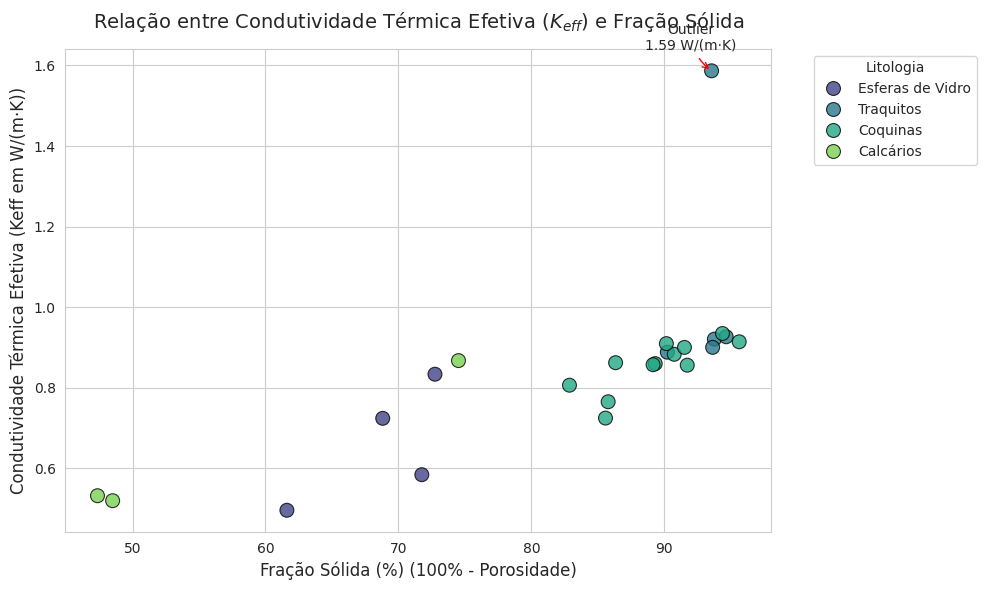

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Consolidação dos Dados da Fração Sólida e Keff
data_keff = {
    'ID da Amostra': [
        'DS23_CF4_3mm', 'DS23_CF5_3mm', 'DS23_CF7_4mm', 'DS23_CF10_M',
        'BC22_TQ-01_40', 'BC22_TQ-02_40', 'BC23_TQ-05_40', 'BC23_TQ-06_40', 'BC23_TQ-07_40',
        'GT24_01_40', 'GT24_02_40', 'GT24_03_40', 'GT24_04_40', 'GT24_05_40', 'GT24_06_40',
        'GT24_07_40', 'GT24_08_40', 'GT24_09_40', 'GT24_10_40', 'GT24_11_40', 'GT24_12_40',
        'VN01_AMOSTRAX', 'VN02_AMOSTRA01', 'VN04_AMOSTRAX2'
    ],
    'Grupo Litológico': [
        'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro',
        'Traquitos', 'Traquitos', 'Traquitos', 'Traquitos', 'Traquitos',
        'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas',
        'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas',
        'Calcários', 'Calcários', 'Calcários'
    ],
    'Fração Sólida (%)': [
        72.75, 71.76, 68.82, 61.61,
        93.77, 90.23, 94.66, 93.56, 93.64,
        85.78, 89.32, 86.34, 91.73, 95.64, 85.58,
        82.87, 90.75, 91.52, 89.16, 90.16, 94.38,
        47.36, 48.50, 74.52
    ],
    'Keff (W/(m·K))': [
        0.8332, 0.5836, 0.7236, 0.4953,
        0.9203, 0.8879, 0.9262, 1.5868, 0.8999,
        0.7648, 0.8595, 0.8618, 0.8556, 0.9137, 0.7242,
        0.8059, 0.8827, 0.8998, 0.8568, 0.9092, 0.9343,
        0.5314, 0.519, 0.867
    ]
}

df_keff = pd.DataFrame(data_keff)

# 2. Configurar o Gráfico de Dispersão (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Gerar o Scatter Plot
scatter = sns.scatterplot(
    data=df_keff,
    x='Fração Sólida (%)',
    y='Keff (W/(m·K))',
    hue='Grupo Litológico',
    palette='viridis',
    s=100,
    alpha=0.8,
    edgecolor='black'
)

# 3. Adicionar Anotações e Estilização
plt.title('Relação entre Condutividade Térmica Efetiva ($K_{eff}$) e Fração Sólida', fontsize=14, pad=15)
plt.xlabel('Fração Sólida (%) (100% - Porosidade)', fontsize=12)
plt.ylabel('Condutividade Térmica Efetiva (Keff em W/(m·K))', fontsize=12)
plt.legend(title='Litologia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Anotar o Outlier (BC23_TQ-06_40)
outlier = df_keff[df_keff['ID da Amostra'] == 'BC23_TQ-06_40']
plt.annotate(
    f"Outlier\n{outlier['Keff (W/(m·K))'].iloc[0]:.2f} W/(m·K)",
    (outlier['Fração Sólida (%)'].iloc[0], outlier['Keff (W/(m·K))'].iloc[0]),
    textcoords="offset points",
    xytext=(-15, 15),
    ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color='red')
)

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
from scipy import stats

# 1. Consolidação dos Dados
data_keff = {
    'ID da Amostra': [
        'DS23_CF4_3mm', 'DS23_CF5_3mm', 'DS23_CF7_4mm', 'DS23_CF10_M',
        'BC22_TQ-01_40', 'BC22_TQ-02_40', 'BC23_TQ-05_40', 'BC23_TQ-06_40', 'BC23_TQ-07_40',
        'GT24_01_40', 'GT24_02_40', 'GT24_03_40', 'GT24_04_40', 'GT24_05_40', 'GT24_06_40',
        'GT24_07_40', 'GT24_08_40', 'GT24_09_40', 'GT24_10_40', 'GT24_11_40', 'GT24_12_40',
        'VN01_AMOSTRAX', 'VN02_AMOSTRA01', 'VN04_AMOSTRAX2'
    ],
    'Grupo Litológico': [
        'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro',
        'Traquitos', 'Traquitos', 'Traquitos', 'Traquitos', 'Traquitos',
        'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas',
        'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas',
        'Calcários', 'Calcários', 'Calcários'
    ],
    'Fração Sólida (%)': [
        72.75, 71.76, 68.82, 61.61,
        93.77, 90.23, 94.66, 93.56, 93.64,
        85.78, 89.32, 86.34, 91.73, 95.64, 85.58,
        82.87, 90.75, 91.52, 89.16, 90.16, 94.38,
        47.36, 48.50, 74.52
    ],
    'Keff (W/(m·K))': [
        0.8332, 0.5836, 0.7236, 0.4953,
        0.9203, 0.8879, 0.9262, 1.5868, 0.8999,
        0.7648, 0.8595, 0.8618, 0.8556, 0.9137, 0.7242,
        0.8059, 0.8827, 0.8998, 0.8568, 0.9092, 0.9343,
        0.5314, 0.519, 0.867
    ]
}

df_keff = pd.DataFrame(data_keff)

# 2. Calcular a Correlação por Grupo Litológico
resultados_correlacao = {}

for grupo, df_grupo in df_keff.groupby('Grupo Litológico'):
    # A correlação só é calculável com 2 ou mais pontos
    if len(df_grupo) >= 2:
        # Correlação de Pearson
        r, p_value = stats.pearsonr(df_grupo['Fração Sólida (%)'], df_grupo['Keff (W/(m·K))'])

        # Coeficiente de Determinação
        r_squared = r**2

        resultados_correlacao[grupo] = {
            'r': r,
            'R²': r_squared,
            'N': len(df_grupo)
        }

# 3. Apresentar os Resultados
print("### Resultados da Correlação (Fração Sólida vs. Keff) ###")
print("-" * 60)

for grupo, resultados in resultados_correlacao.items():
    print(f"GRUPO: {grupo} (N={resultados['N']})")
    print(f"  Correlação de Pearson (r): {resultados['r']:.4f}")
    print(f"  Coeficiente de Determinação (R²): {resultados['R²']:.4f}")
    print("-" * 60)

### Resultados da Correlação (Fração Sólida vs. Keff) ###
------------------------------------------------------------
GRUPO: Calcários (N=3)
  Correlação de Pearson (r): 0.9977
  Coeficiente de Determinação (R²): 0.9953
------------------------------------------------------------
GRUPO: Coquinas (N=12)
  Correlação de Pearson (r): 0.7947
  Coeficiente de Determinação (R²): 0.6316
------------------------------------------------------------
GRUPO: Esferas de Vidro (N=4)
  Correlação de Pearson (r): 0.7280
  Coeficiente de Determinação (R²): 0.5299
------------------------------------------------------------
GRUPO: Traquitos (N=5)
  Correlação de Pearson (r): 0.1707
  Coeficiente de Determinação (R²): 0.0291
------------------------------------------------------------


<>:92: SyntaxWarning: invalid escape sequence '\c'
<>:92: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-1952761318.py:92: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Condutividade Térmica Efetiva ($W \cdot m^{-1} \cdot K^{-1}$)', fontsize=12)


<Figure size 1200x800 with 0 Axes>

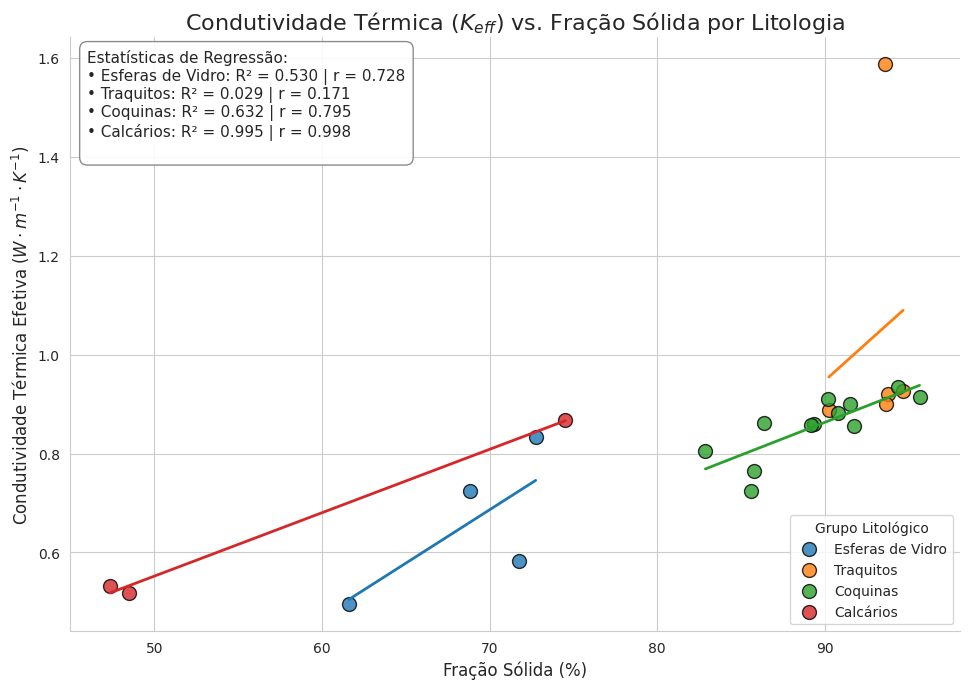

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Carregar os Dados
data_keff = {
    'ID da Amostra': [
        'DS23_CF4_3mm', 'DS23_CF5_3mm', 'DS23_CF7_4mm', 'DS23_CF10_M',
        'BC22_TQ-01_40', 'BC22_TQ-02_40', 'BC23_TQ-05_40', 'BC23_TQ-06_40', 'BC23_TQ-07_40',
        'GT24_01_40', 'GT24_02_40', 'GT24_03_40', 'GT24_04_40', 'GT24_05_40', 'GT24_06_40',
        'GT24_07_40', 'GT24_08_40', 'GT24_09_40', 'GT24_10_40', 'GT24_11_40', 'GT24_12_40',
        'VN01_AMOSTRAX', 'VN02_AMOSTRA01', 'VN04_AMOSTRAX2'
    ],
    'Grupo Litológico': [
        'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro',
        'Traquitos', 'Traquitos', 'Traquitos', 'Traquitos', 'Traquitos',
        'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas',
        'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas',
        'Calcários', 'Calcários', 'Calcários'
    ],
    'Fração Sólida (%)': [
        72.75, 71.76, 68.82, 61.61,
        93.77, 90.23, 94.66, 93.56, 93.64,
        85.78, 89.32, 86.34, 91.73, 95.64, 85.58,
        82.87, 90.75, 91.52, 89.16, 90.16, 94.38,
        47.36, 48.50, 74.52
    ],
    'Keff': [
        0.8332, 0.5836, 0.7236, 0.4953,
        0.9203, 0.8879, 0.9262, 1.5868, 0.8999,
        0.7648, 0.8595, 0.8618, 0.8556, 0.9137, 0.7242,
        0.8059, 0.8827, 0.8998, 0.8568, 0.9092, 0.9343,
        0.5314, 0.519, 0.867
    ]
}

df = pd.DataFrame(data_keff)

# 2. Calcular Estatísticas para a Legenda
stats_text = "Estatísticas de Regressão:\n"
grupos = df['Grupo Litológico'].unique()

# Dicionário de cores para corresponder ao gráfico (padrão 'tab10' do seaborn)
colors = sns.color_palette('tab10', n_colors=len(grupos))
palette_dict = dict(zip(grupos, colors))

# Loop para calcular regressão de cada grupo e adicionar ao texto
for grupo in grupos:
    subset = df[df['Grupo Litológico'] == grupo]
    if len(subset) > 1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(subset['Fração Sólida (%)'], subset['Keff'])
        r_squared = r_value**2
        stats_text += f"• {grupo}: R² = {r_squared:.3f} | r = {r_value:.3f}\n"

# 3. Gerar o Gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Usar lmplot para criar scatter + linhas de regressão automaticamente
# Note: lmplot cria uma nova figura (FacetGrid), então configuramos o tamanho nele
g = sns.lmplot(
    data=df,
    x='Fração Sólida (%)',
    y='Keff',
    hue='Grupo Litológico',
    height=7,
    aspect=1.4,
    palette='tab10',
    ci=None, # Remove a sombra do intervalo de confiança para limpar o visual
    legend=False, # Removemos a legenda padrão para criar a nossa personalizada
    scatter_kws={'s': 100, 'edgecolor': 'black', 'alpha': 0.8},
    line_kws={'linewidth': 2}
)

ax = g.ax # Obter o eixo atual

# 4. Adicionar a Caixa de Texto com as Estatísticas
# bbox define a caixa (cor de fundo branca, borda cinza, levemente transparente)
ax.text(
    0.02, 0.98, # Posição x, y (coordenadas relativas do eixo: 0 a 1)
    stats_text,
    transform=ax.transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, edgecolor='gray')
)

# 5. Ajustes Finais e Legenda Gráfica
plt.title('Condutividade Térmica ($K_{eff}$) vs. Fração Sólida por Litologia', fontsize=16)
plt.xlabel('Fração Sólida (%)', fontsize=12)
plt.ylabel('Condutividade Térmica Efetiva ($W \cdot m^{-1} \cdot K^{-1}$)', fontsize=12)

# Recolocar a legenda das cores (Litologias) no canto inferior direito
plt.legend(title='Grupo Litológico', loc='lower right', frameon=True)

plt.tight_layout()
plt.show()

<>:67: SyntaxWarning: invalid escape sequence '\c'
<>:67: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-2988870233.py:67: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Condutividade Térmica ($W \cdot m^{-1} \cdot K^{-1}$)', fontsize=12)


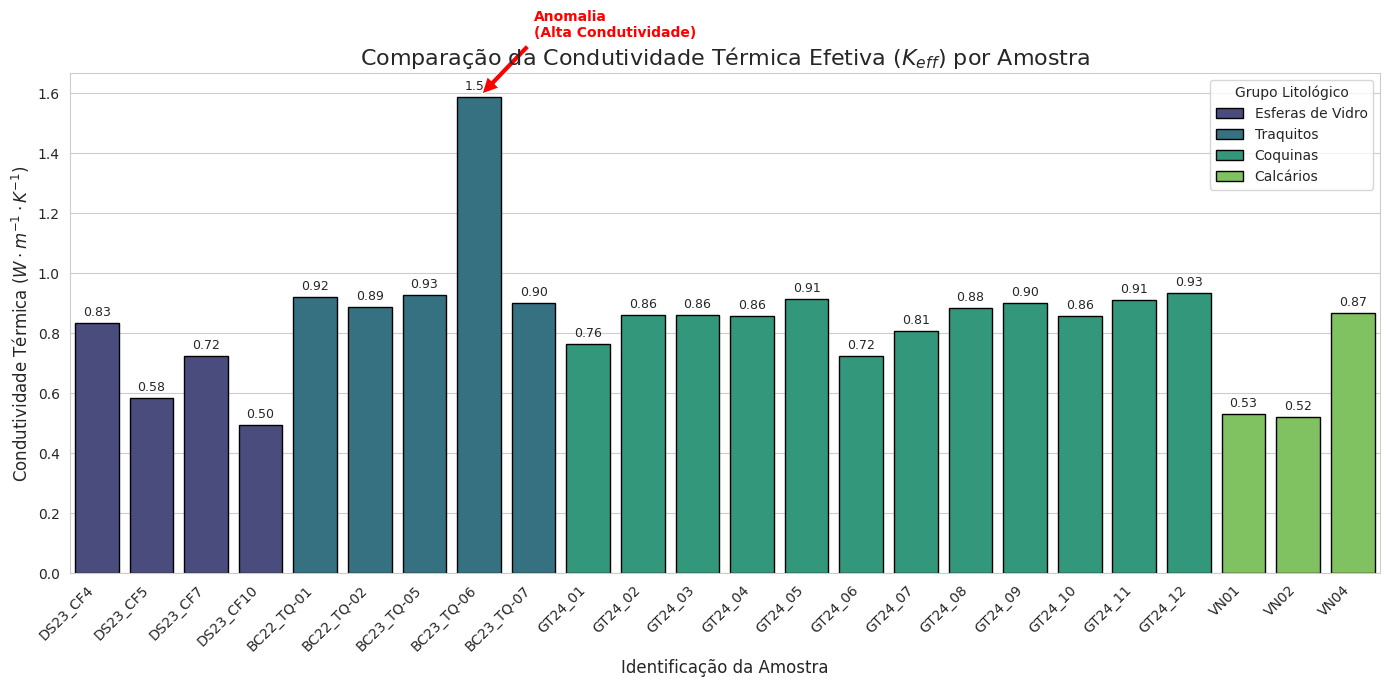

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os Dados
data_keff = {
    'ID da Amostra': [
        'DS23_CF4', 'DS23_CF5', 'DS23_CF7', 'DS23_CF10', # Esferas (Encurtei os nomes para caber no gráfico)
        'BC22_TQ-01', 'BC22_TQ-02', 'BC23_TQ-05', 'BC23_TQ-06', 'BC23_TQ-07', # Traquitos
        'GT24_01', 'GT24_02', 'GT24_03', 'GT24_04', 'GT24_05', 'GT24_06',
        'GT24_07', 'GT24_08', 'GT24_09', 'GT24_10', 'GT24_11', 'GT24_12', # Coquinas
        'VN01', 'VN02', 'VN04' # Calcários
    ],
    'Grupo Litológico': [
        'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro',
        'Traquitos', 'Traquitos', 'Traquitos', 'Traquitos', 'Traquitos',
        'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas',
        'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas',
        'Calcários', 'Calcários', 'Calcários'
    ],
    'Keff': [
        0.8332, 0.5836, 0.7236, 0.4953,
        0.9203, 0.8879, 0.9262, 1.5868, 0.8999,
        0.7648, 0.8595, 0.8618, 0.8556, 0.9137, 0.7242,
        0.8059, 0.8827, 0.8998, 0.8568, 0.9092, 0.9343,
        0.5314, 0.519, 0.867
    ]
}

df = pd.DataFrame(data_keff)

# 2. Configurar o Gráfico
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Criar o gráfico de barras
# dodge=False garante que as barras fiquem alinhadas corretamente no eixo X
barplot = sns.barplot(
    data=df,
    x='ID da Amostra',
    y='Keff',
    hue='Grupo Litológico',
    palette='viridis',
    edgecolor='black',
    dodge=False
)

# 3. Adicionar os valores no topo das barras
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', padding=3, fontsize=9, rotation=0)

# 4. Destacar o Outlier (Opcional, mas recomendado)
# Encontrar a posição da barra do outlier
outlier_idx = df[df['Keff'] > 1.2].index[0]
val_outlier = df.loc[outlier_idx, 'Keff']
# Nota: A posição x no barplot corresponde ao índice numérico da categoria
plt.annotate(
    'Anomalia\n(Alta Condutividade)',
    xy=(outlier_idx, val_outlier),
    xytext=(outlier_idx + 1, val_outlier + 0.2),
    arrowprops=dict(facecolor='red', shrink=0.05),
    fontsize=10, color='red', fontweight='bold'
)

# 5. Ajustes Finais
plt.title('Comparação da Condutividade Térmica Efetiva ($K_{eff}$) por Amostra', fontsize=16)
plt.ylabel('Condutividade Térmica ($W \cdot m^{-1} \cdot K^{-1}$)', fontsize=12)
plt.xlabel('Identificação da Amostra', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotacionar nomes para leitura fácil
plt.legend(title='Grupo Litológico', bbox_to_anchor=(1, 1)) # Legenda fora para não cobrir dados

plt.tight_layout()
plt.show()

<>:54: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-3470204896.py:54: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Condutividade Térmica ($W \cdot m^{-1} \cdot K^{-1}$)', fontsize=12)


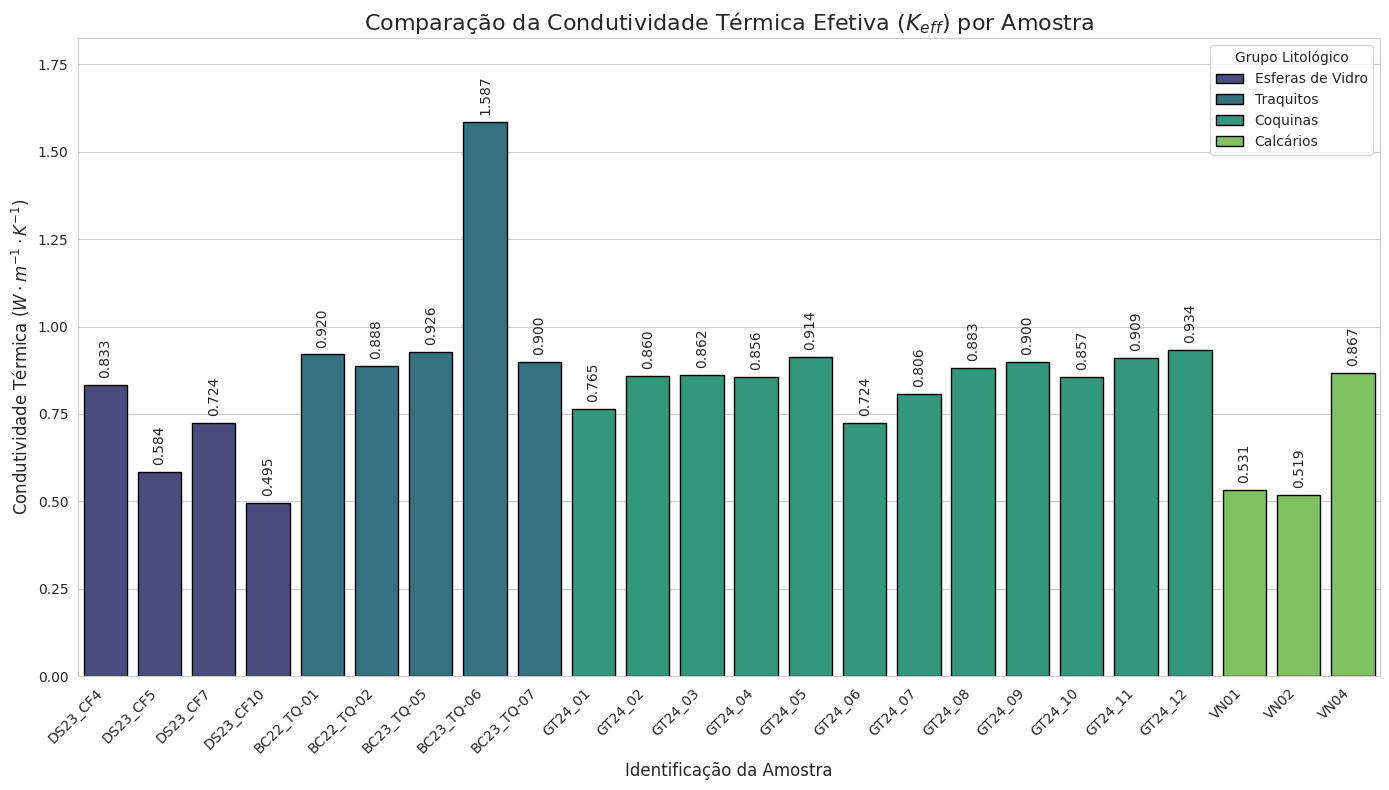

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os Dados
data_keff = {
    'ID da Amostra': [
        'DS23_CF4', 'DS23_CF5', 'DS23_CF7', 'DS23_CF10',
        'BC22_TQ-01', 'BC22_TQ-02', 'BC23_TQ-05', 'BC23_TQ-06', 'BC23_TQ-07',
        'GT24_01', 'GT24_02', 'GT24_03', 'GT24_04', 'GT24_05', 'GT24_06',
        'GT24_07', 'GT24_08', 'GT24_09', 'GT24_10', 'GT24_11', 'GT24_12',
        'VN01', 'VN02', 'VN04'
    ],
    'Grupo Litológico': [
        'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro',
        'Traquitos', 'Traquitos', 'Traquitos', 'Traquitos', 'Traquitos',
        'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas',
        'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas',
        'Calcários', 'Calcários', 'Calcários'
    ],
    'Keff': [
        0.8332, 0.5836, 0.7236, 0.4953,
        0.9203, 0.8879, 0.9262, 1.5868, 0.8999,
        0.7648, 0.8595, 0.8618, 0.8556, 0.9137, 0.7242,
        0.8059, 0.8827, 0.8998, 0.8568, 0.9092, 0.9343,
        0.5314, 0.519, 0.867
    ]
}

df = pd.DataFrame(data_keff)

# 2. Configurar o Gráfico
plt.figure(figsize=(14, 8)) # Aumentei um pouco a altura para caber os números
sns.set_style("whitegrid")

# Criar o gráfico de barras
barplot = sns.barplot(
    data=df,
    x='ID da Amostra',
    y='Keff',
    hue='Grupo Litológico',
    palette='viridis',
    edgecolor='black',
    dodge=False
)

# 3. Adicionar os valores no topo das barras (3 casas decimais)
for container in barplot.containers:
    # rotation=90 coloca o número na vertical para não encavalar
    barplot.bar_label(container, fmt='%.3f', padding=5, fontsize=10, rotation=90)

# 4. Ajustes Finais
plt.title('Comparação da Condutividade Térmica Efetiva ($K_{eff}$) por Amostra', fontsize=16)
plt.ylabel('Condutividade Térmica ($W \cdot m^{-1} \cdot K^{-1}$)', fontsize=12)
plt.xlabel('Identificação da Amostra', fontsize=12)

# Rotacionar nomes do eixo X
plt.xticks(rotation=45, ha='right')

# Expandir o limite superior do eixo Y para dar espaço aos números verticais
plt.ylim(0, df['Keff'].max() * 1.15)

# Legenda
plt.legend(title='Grupo Litológico', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

<>:92: SyntaxWarning: invalid escape sequence '\c'
<>:92: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-2665590504.py:92: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Condutividade Térmica Efetiva ($W \cdot m^{-1} \cdot K^{-1}$)', fontsize=12)


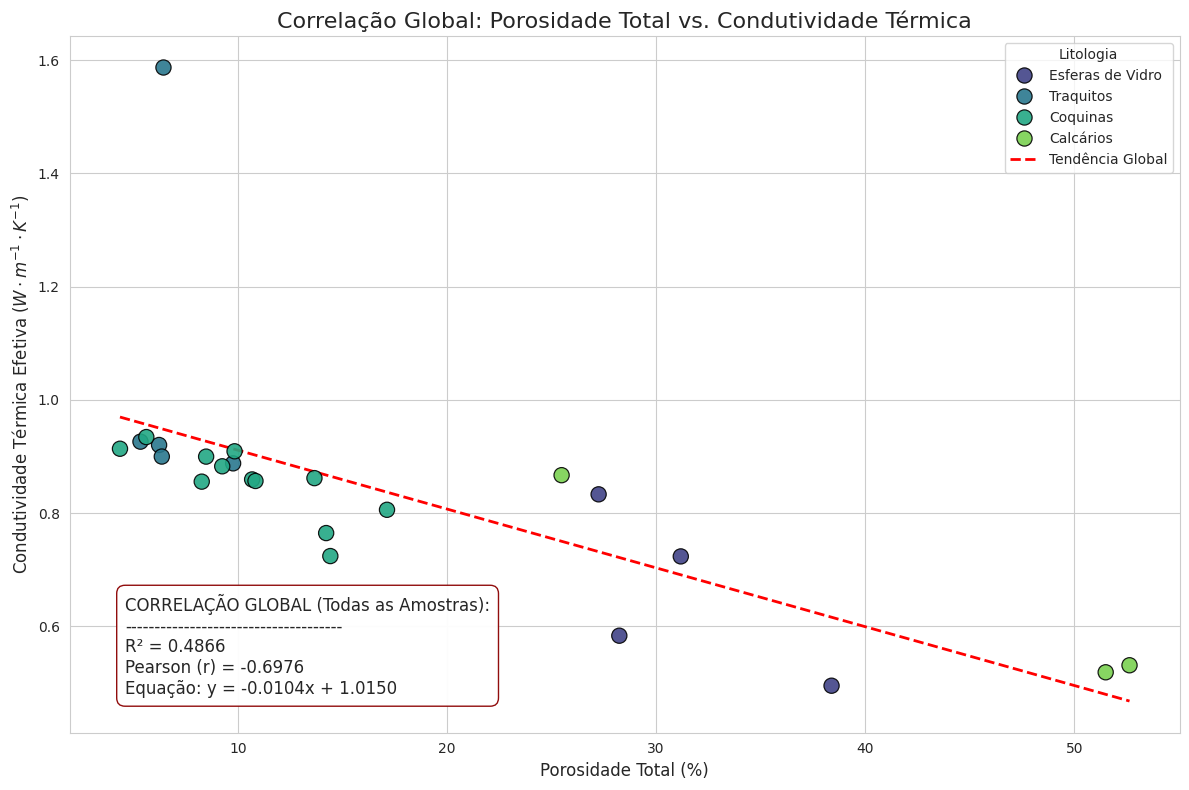

CORRELAÇÃO GLOBAL (Todas as Amostras):
-------------------------------------
R² = 0.4866
Pearson (r) = -0.6976
Equação: y = -0.0104x + 1.0150


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 1. Carregar os Dados
data_keff = {
    'ID da Amostra': [
        'DS23_CF4_3mm', 'DS23_CF5_3mm', 'DS23_CF7_4mm', 'DS23_CF10_M',
        'BC22_TQ-01_40', 'BC22_TQ-02_40', 'BC23_TQ-05_40', 'BC23_TQ-06_40', 'BC23_TQ-07_40',
        'GT24_01_40', 'GT24_02_40', 'GT24_03_40', 'GT24_04_40', 'GT24_05_40', 'GT24_06_40',
        'GT24_07_40', 'GT24_08_40', 'GT24_09_40', 'GT24_10_40', 'GT24_11_40', 'GT24_12_40',
        'VN01_AMOSTRAX', 'VN02_AMOSTRA01', 'VN04_AMOSTRAX2'
    ],
    'Grupo Litológico': [
        'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro', 'Esferas de Vidro',
        'Traquitos', 'Traquitos', 'Traquitos', 'Traquitos', 'Traquitos',
        'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas',
        'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas', 'Coquinas',
        'Calcários', 'Calcários', 'Calcários'
    ],
    'Fração Sólida (%)': [
        72.75, 71.76, 68.82, 61.61,
        93.77, 90.23, 94.66, 93.56, 93.64,
        85.78, 89.32, 86.34, 91.73, 95.64, 85.58,
        82.87, 90.75, 91.52, 89.16, 90.16, 94.38,
        47.36, 48.50, 74.52
    ],
    'Keff': [
        0.8332, 0.5836, 0.7236, 0.4953,
        0.9203, 0.8879, 0.9262, 1.5868, 0.8999,
        0.7648, 0.8595, 0.8618, 0.8556, 0.9137, 0.7242,
        0.8059, 0.8827, 0.8998, 0.8568, 0.9092, 0.9343,
        0.5314, 0.519, 0.867
    ]
}

df = pd.DataFrame(data_keff)

# Calcular Porosidade (%) = 100 - Fração Sólida
df['Porosidade (%)'] = 100 - df['Fração Sólida (%)']

# 2. Calcular Regressão Global (Todas as amostras juntas)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Porosidade (%)'], df['Keff'])
r_squared = r_value**2
equation = f"y = {slope:.4f}x + {intercept:.4f}"

# 3. Configurar o Gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plotar os pontos coloridos por grupo (apenas visualização)
sns.scatterplot(
    data=df,
    x='Porosidade (%)',
    y='Keff',
    hue='Grupo Litológico',
    palette='viridis',
    s=120,
    edgecolor='black',
    alpha=0.9,
    zorder=2
)

# Plotar a Linha de Regressão Global
x_vals = np.array([df['Porosidade (%)'].min(), df['Porosidade (%)'].max()])
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=2, label='Tendência Global', zorder=1)

# 4. Adicionar Legenda Estatística Global
stats_box = (
    f"CORRELAÇÃO GLOBAL (Todas as Amostras):\n"
    f"-------------------------------------\n"
    f"R² = {r_squared:.4f}\n"
    f"Pearson (r) = {r_value:.4f}\n"
    f"Equação: {equation}"
)

plt.gca().text(
    0.05, 0.05, # Posição x, y
    stats_box,
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='bottom',
    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.95, edgecolor='darkred')
)

# 5. Ajustes Finais
plt.title('Correlação Global: Porosidade Total vs. Condutividade Térmica', fontsize=16)
plt.xlabel('Porosidade Total (%)', fontsize=12)
plt.ylabel('Condutividade Térmica Efetiva ($W \cdot m^{-1} \cdot K^{-1}$)', fontsize=12)
plt.legend(title='Litologia', loc='upper right')

plt.tight_layout()
plt.show()

# Imprimir resultado no console também
print(stats_box)